In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
df = pd.read_excel(url, sheet_name='COVID-19-geographic-disbtributi')

In [3]:
#Choose and rename columns
df = df.drop(columns=['day', 'month', 'year', 'geoId'])
df.columns = ['date', 'daily_cases', 'daily_deaths', 'country', 'code', 'population', 'Continent']

#Add days since first case
df['day'] = (df.date - df.date.min()).dt.days+1

#Add cumalative cases/deaths
df = df.reindex(index=df.index[::-1]) #reverse order
df['cum_cases'] = df.groupby(['country'])['daily_cases'].cumsum()
df['cum_deaths'] = df.groupby(['country'])['daily_deaths'].cumsum()

#Add percent change in cases/deaths since previous day
df['pct_change_cases'] = df.groupby(['country'])['daily_cases'].pct_change()
df['pct_change_deaths'] = df.groupby(['country'])['daily_deaths'].pct_change()
df = df.reindex(index=df.index[::-1]) #un-reverse order

#Convert pop to millions
df['population']=df.population.transform(lambda x: x/1000000)

#Add deaths per million
df['daily_deaths_per_mil'] = df.daily_deaths/df.population
df['cum_deaths_per_mil'] = df.cum_deaths/df.population

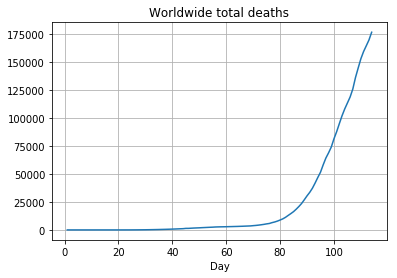

In [4]:
#Plot total deaths worldwide

plt.plot(df.groupby('day').cum_deaths.sum())
plt.xlabel('Day')
plt.title('Worldwide total deaths')
plt.grid()

In [11]:
#Countries with most deaths per mil pop yesterday
today_df = df[df.day == df.day.max()]
today_df[today_df.cum_cases>100].sort_values('daily_deaths_per_mil', ascending=False).head(20)

,date,daily_cases,daily_deaths,country,code,population,Continent,day,cum_cases,cum_deaths,pct_change_cases,pct_change_deaths,daily_deaths_per_mil,cum_deaths_per_mil
9838,2020-04-22,14,1,San_Marino,SMR,0.033785,Europe,114,476,40,13.000000,inf,29.598934,1183.957378
10905,2020-04-22,545,185,Sweden,SWE,10.183175,Europe,114,15322,1765,0.390306,3.625000,18.167222,173.325117
1239,2020-04-22,973,170,Belgium,BEL,11.422068,Europe,114,40956,5998,-0.345662,0.172414,14.883469,525.123822
258,2020-04-22,0,1,Andorra,AND,0.077006,Europe,114,717,37,-1.000000,inf,12.986001,480.482040
11790,2020-04-22,4301,828,United_Kingdom,GBR,66.488991,Europe,114,129044,17337,-0.080197,0.844098,12.453189,260.749934
5822,2020-04-22,7,1,Isle_of_Man,IMN,0.084077,Europe,114,307,10,2.500000,-0.666667,11.893859,118.938592
8039,2020-04-22,729,165,Netherlands,NLD,17.231017,Europe,114,34134,3916,-0.028000,1.462687,9.575755,227.264589
10612,2020-04-22,3968,430,Spain,ESP,46.723749,Europe,114,204178,21282,-0.069855,0.077694,9.203029,455.485710
5710,2020-04-22,388,43,Ireland,IRL,4.853506,Europe,114,16040,730,-0.032419,-0.441558,8.859575,150.406737
5966,2020-04-22,2729,534,Italy,ITA,60.431283,Europe,114,183957,24648,0.209663,0.176211,8.836483,407.868223


In [6]:
def graph_total_deaths(*countries):
    mindate=-1
    for country in countries:
        plt.plot(df[df.code==country].groupby('day').cum_deaths.sum(), label = df['country'][df.code==country].iloc[0])
        df_country = df[df.code==country]
        if df_country[df_country.cum_deaths > 10].day.min() < mindate or mindate==-1:
            mindate = df_country[df_country.cum_deaths > 10].day.min()
    plt.legend()
    plt.xlabel('Day')
    plt.title('Total deaths')
    plt.grid()
    plt.xlim(left=mindate)

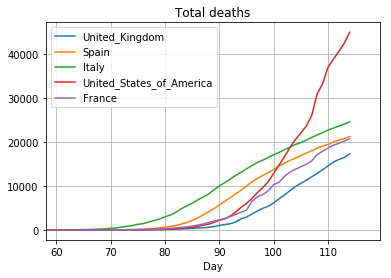

In [7]:
graph_total_deaths('GBR','ESP','ITA','USA','FRA')

In [8]:
def graph_daily_deaths(*countries):
    mindate=-1
    for country in countries:
        plt.plot(df[df.code==country].groupby('day').daily_deaths.sum(), label = df['country'][df.code==country].iloc[0])
        df_country = df[df.code==country]
        if df_country[df_country.cum_deaths > 10].day.min() < mindate or mindate==-1:
            mindate = df_country[df_country.cum_deaths > 10].day.min()
    plt.legend()
    plt.xlabel('Day')
    plt.title('Daily deaths')
    plt.grid()
    plt.xlim(left=mindate)

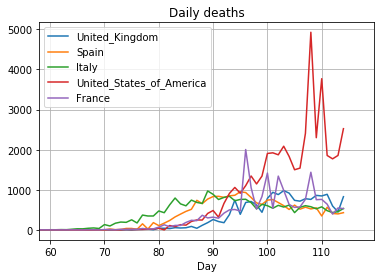

In [9]:
graph_daily_deaths('GBR','ESP','ITA','USA','FRA')

(60, 119.65)

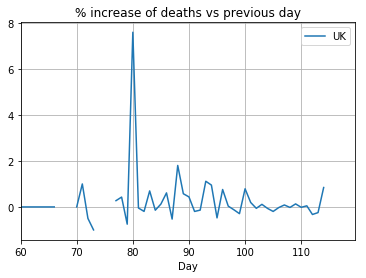

In [10]:
plt.plot(df[df.code=='GBR'].groupby('day').pct_change_deaths.sum(), label = 'UK')
plt.legend()
plt.xlabel('Day')
plt.title('% increase of deaths vs previous day')
plt.grid()
plt.xlim(left=60)